In [ ]:
import requests
import pandas as pd

headers = {
    "Authorization": "Bearer YOUR_API_KEY",
}

# utility functions to flatten the data from nested dictionaries

def process_metrics(data):
    dataset_metrics = {}
    for metric in data["dataset_metrics"]:
        metric_name = metric["name"]
        dataset_metrics[metric_name] = {
            **metric
        }
    data["dataset_metrics"] = dataset_metrics
    return data

def flatten(data: dict):
    flat = {}
    for key, value in data.items():
        if isinstance(value, dict):
            # Recursively flatten the dictionary
            nested = flatten(value)
            for nested_key, nested_value in nested.items():
                flat[f"{key}.{nested_key}"] = nested_value
        else:
            flat[key] = value
    return flat

In [2]:
response = requests.get(
    "https://mteval2.hrabal.eu/api/v1/namespaces/default/translations-runs/?dataset_id=4",
    headers=headers,
)
runs = response.json()
runs = [process_metrics(run) for run in runs]
runs = [flatten(run) for run in runs]

In [3]:
df = pd.DataFrame(runs)
df

,id,uuid,dataset.id,dataset.names,dataset.source_lang,dataset.target_lang,dataset.has_reference,namespace_name,config.uuid,config.run_id,...,dataset_metrics.CometKiwi22.run_id,dataset_metrics.Gemma3_DSPy_v1.1.name,dataset_metrics.Gemma3_DSPy_v1.1.score,dataset_metrics.Gemma3_DSPy_v1.1.higher_is_better,dataset_metrics.Gemma3_DSPy_v1.1.run_id,dataset_metrics.MetricX24[noref].name,dataset_metrics.MetricX24[noref].score,dataset_metrics.MetricX24[noref].higher_is_better,dataset_metrics.MetricX24[noref].run_id,tags
0,174,f738f165-ffd9-4b89-9e7a-1f3916721aad,4,[wmt23],English,Czech,True,default,5e851459-8f8f-4afb-8ef4-60a47e529855,fa84293661a6ecaee60d1cebbb9759a46dc88f0fb39ca2...,...,174,Gemma3_DSPy_v1.1,90.265188,True,174,MetricX24[noref],3.751914,False,174,[]
1,173,a39ca47b-8403-421d-a307-9465164f33fb,4,[wmt23],English,Czech,True,default,3840fe19-26fe-43ca-b177-eba7b35e2b85,6ecf55492539cd3c8ebcfd75ae01d4e5786710cc578c6d...,...,173,Gemma3_DSPy_v1.1,90.248312,True,173,MetricX24[noref],3.738648,False,173,[]
2,172,f795cb6f-8b24-4564-b344-fa590d53cc03,4,[wmt23],English,Czech,True,default,539c6ec2-05f0-42f3-9c18-5a7159d2698a,1549004d70811b4840aeb23a946b3a9041a36e91d56480...,...,172,Gemma3_DSPy_v1.1,89.952266,True,172,MetricX24[noref],3.741619,False,172,[]
3,171,e163766b-ccea-4f72-ae1d-eda63f9c7ac5,4,[wmt23],English,Czech,True,default,27922705-1d14-48b3-92e5-54a1f89ce31d,a5d00f48c700ddb212552a0549abbb9bdf31a2c381aec4...,...,171,Gemma3_DSPy_v1.1,89.858245,True,171,MetricX24[noref],3.764019,False,171,[]
4,169,9a1c3d48-3f12-4189-ad34-7d4d97474e69,4,[wmt23],English,Czech,True,default,97802267-7e09-48a4-8ebe-bf59ed4d5184,e51b8f8301a10da94f543efb2bbd0d12d61dac572fc4df...,...,169,Gemma3_DSPy_v1.1,90.252652,True,169,MetricX24[noref],3.663601,False,169,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,10,be2aabea-f4a2-4dbf-a4f6-05e40824f8f4,4,[wmt23],English,Czech,True,default,231e24a0-658f-4bc0-aee0-70f3ae636140,8eb9e5cc173bd4b87a7bb1d46ad44a0846b5172a18d028...,...,10,Gemma3_DSPy_v1.1,90.147059,True,10,MetricX24[noref],3.671690,False,10,[]
81,9,99162106-71a4-49b3-8631-0fd2ea19413a,4,[wmt23],English,Czech,True,default,6c26352b-94bc-4588-a7a9-c6c6493d10e3,dd519b4b2c1a9006aad8ef90a2552079fc8c3486acd27c...,...,9,Gemma3_DSPy_v1.1,90.277724,True,9,MetricX24[noref],3.718805,False,9,[]
82,8,10945cfd-7766-4e9b-96a3-be28d270ca81,4,[wmt23],English,Czech,True,default,174a25da-3e9e-4d13-80fa-4a57fca8c019,02dd1642a32990f78e896bf7800188d336f08b4b5043d8...,...,8,Gemma3_DSPy_v1.1,90.291707,True,8,MetricX24[noref],3.687839,False,8,[]
83,7,a137fcdb-9627-45d8-a094-dbcaa40e08cd,4,[wmt23],English,Czech,True,default,f89e159d-d2f7-4a36-a0a4-adb43957ed86,ab2fc36afcf129f0ef120640d2522cafcd51ed2f26c13e...,...,7,Gemma3_DSPy_v1.1,90.192382,True,7,MetricX24[noref],3.685364,False,7,[]


<Axes: xlabel='dataset_metrics.MetricX24[noref].score', ylabel='dataset_metrics.Gemma3_DSPy_v1.1.score'>

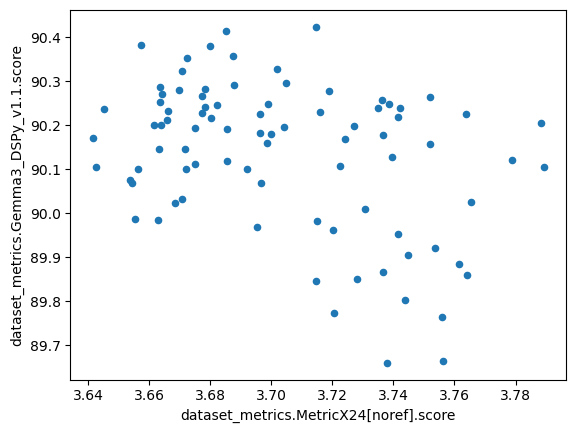

In [4]:
df.plot.scatter("dataset_metrics.MetricX24[noref].score", "dataset_metrics.Gemma3_DSPy_v1.1.score")

<Axes: xlabel='dataset_metrics.BLEU.score', ylabel='dataset_metrics.Gemma3_DSPy_v1.1.score'>

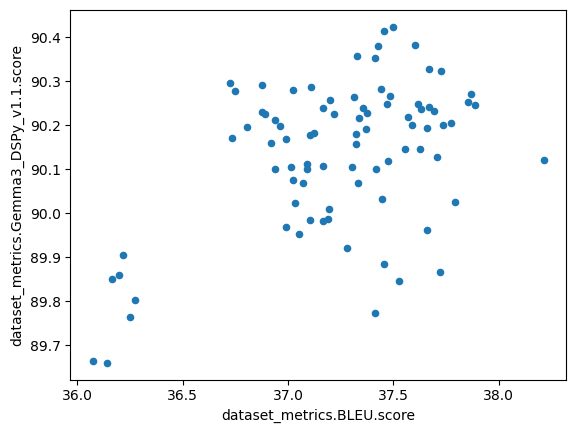

In [5]:
df.plot.scatter("dataset_metrics.BLEU.score", "dataset_metrics.Gemma3_DSPy_v1.1.score")

<Axes: xlabel='dataset_metrics.CometKiwi22.score', ylabel='dataset_metrics.Gemma3_DSPy_v1.1.score'>

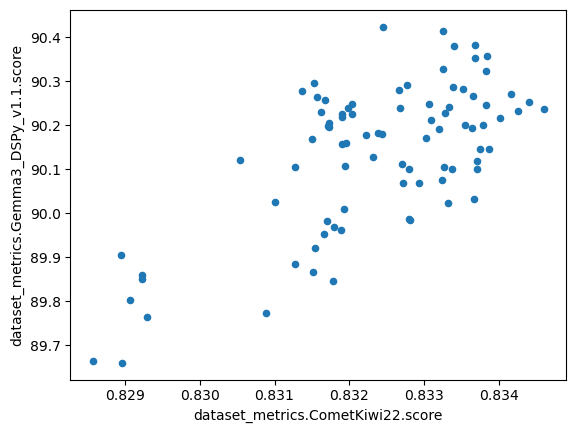

In [6]:
df.plot.scatter("dataset_metrics.CometKiwi22.score", "dataset_metrics.Gemma3_DSPy_v1.1.score")

In [7]:
df[["dataset_metrics.MetricX24[noref].score", "dataset_metrics.Gemma3_DSPy_v1.1.score"]].corr()

,dataset_metrics.MetricX24[noref].score,dataset_metrics.Gemma3_DSPy_v1.1.score
dataset_metrics.MetricX24[noref].score,1.000000,-0.374872
dataset_metrics.Gemma3_DSPy_v1.1.score,-0.374872,1.000000
